In [77]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import pylab as pl

In [27]:
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    See Also:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def read(file_name):

    df = pd.DataFrame()

    pattern = r'[(?!=.)]([a-z]*)'
    file_type = re.findall(pattern, file_name)[0]

    assert file_type == 'csv'
    with open(file_name, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for index,row in enumerate(reader):
            df = pd.concat([df,pd.DataFrame(row).transpose()])
   
    return df.reset_index(drop=True)

def read_file(file_name):

    pattern = r'[(?!=.)]([a-z]*)'
    file_type = re.findall(pattern, file_name)[0]
    
    if file_type == 'csv':
        df = pd.read_csv(file_name)
      
    elif file_type == 'xls':
        df = pd.read_excel(file_name)
    
    return df

In [28]:
credit_data = read_file('credit-data.csv')

In [29]:
credit_data.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [30]:
def list_describe(df,optional_string=None):
    opt_columns = []
    all_cols = {}
    for index,column in enumerate(df.columns):
        if optional_string:
            if column.startswith(optional_string):
                opt_columns.append(column)

        print(df[str(column)].describe().to_frame(),'\n')
        if not index:
            continue
        all_cols[index] = camel_to_snake(column)
    #if len(opt_columns):
    return all_cols, opt_columns
   #return all_cols

At this point, it seems useful to inspect the distribution of the data by column

In [31]:
all_cols, pt_columns = list_describe(credit_data,'NumberOfTime')

            PersonID
count  150000.000000
mean    75000.500000
std     43301.414527
min         1.000000
25%     37500.750000
50%     75000.500000
75%    112500.250000
max    150000.000000 

       SeriousDlqin2yrs
count     150000.000000
mean           0.066840
std            0.249746
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000 

       RevolvingUtilizationOfUnsecuredLines
count                         150000.000000
mean                               6.048438
std                              249.755371
min                                0.000000
25%                                0.029867
50%                                0.154181
75%                                0.559046
max                            50708.000000 

                 age
count  150000.000000
mean       52.295207
std        14.771866
min         0.000000
25%        41.000000
50%        52.000000
75%        63.000000
max       109.000000 

  

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [32]:
all_cols

{1: 'serious_dlqin2yrs',
 2: 'revolving_utilization_of_unsecured_lines',
 3: 'age',
 4: 'zipcode',
 5: 'number_of_time30-59_days_past_due_not_worse',
 6: 'debt_ratio',
 7: 'monthly_income',
 8: 'number_of_open_credit_lines_and_loans',
 9: 'number_of_times90_days_late',
 10: 'number_real_estate_loans_or_lines',
 11: 'number_of_time60-89_days_past_due_not_worse',
 12: 'number_of_dependents'}

In [33]:
def cross_vectors(df, var1, var2):
    return pd.crosstab(df[var1], df[var2])

In [34]:
cross_vectors(credit_data, 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs')

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


NOTE: All that are missing monthly_income are also missing number of dependents

In [35]:
data_dict =read_file('Data Dictionary.xls')

In [36]:
data_dict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,zipcode,zipcode of the borrower,interget/string
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [37]:
credit_data.groupby('zipcode').size().to_frame()

,0
zipcode,
60601,16599
60618,16612
60625,33514
60629,16840
60637,16625
60644,16581
60657,16624
60804,16605


In [38]:
def check_na(df):
    df_lng = pd.melt(df)
    null_vars = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_vars)

In [39]:
null_monthly_income_or_null_dependents = credit_data[credit_data.MonthlyIncome.isnull()| credit_data.NumberOfDependents.isnull()]
null_monthly_income_alone = credit_data[credit_data.MonthlyIncome.isnull()]

def check_diff(df1,df2):
    diff = set(df1.index)-set(df2.index)
    return(len(diff))

In [40]:
check_diff(null_monthly_income_alone,null_monthly_income_or_null_dependents)

0

In [41]:
from sklearn.cross_validation import train_test_split

def cross_validate(X,y):
    #Output:X_train, X_test, y_train, y_test 
    return train_test_split(X, y, test_size = .2, random_state = 0)

In [42]:

def preprocess_by_mean(file_name):
    df = df.fillna(df.mean())
    return df


from sklearn.preprocessing import Imputer
def preprocess_imputer(credit_data):
    imputer = Imputer(missing_values='NaN', strategy = 'median', axis = 0)
    imputer = imputer.fit(credit_data)
    credit_data= imputer.transform(credit_data)
    return credit_data

In [43]:
credit_imputed = preprocess_imputer(credit_data)
#credit_imputed
credit_imputed = pd.DataFrame(credit_imputed).drop(0,axis=1).rename(columns = all_cols)
credit_imputed.number_of_dependents = credit_imputed.number_of_dependents.fillna(0)
credit_imputed.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1.0,0.766127,45.0,60644.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,60637.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,60601.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,60601.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,60625.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


According to the following article: #https://www.consumerfinance.gov/askcfpb/1791/what-debt-income-ratio-why-43-debt-income-ratio-important.html
having a debt-income-ratio below 43% is ideal

In [124]:
very_high = credit_imputed.debt_ratio > 100.000000
credit_imputed[very_high].debt_ratio.describe()
len(credit_imputed[very_high])/len(credit_imputed)
need_dummies = []
#http://www.investopedia.com/university/ratios/debt/ratio2.asp

group_names = ['dr_very_low','dr_low','dr_moderately_low','dr_slightly_high','dr_high','dr_extremely_high']
bins = [float(-1),float(.20),float(.40),float(.60),float(.80),float(1.00),float(329665)]
dr_cat = 'dr_category'
need_dummies.append(dr_cat)
credit_imputed[dr_cat] = pd.cut(credit_imputed.debt_ratio, bins, labels=group_names)


According to the following source: http://www.creditcards.com/credit-card-news/credit-utilization-fico-1270.php. It is good to have a revolving utilization rate below 30%

In [125]:
very_high = credit_imputed.revolving_utilization_of_unsecured_lines > 1.000000
under_or_at_100 = credit_imputed.revolving_utilization_of_unsecured_lines <= 1.000000
credit_imputed[very_high].revolving_utilization_of_unsecured_lines.describe()
credit_imputed[under_or_at_100].revolving_utilization_of_unsecured_lines.describe()
group_names = ['rvus_low','rvus_moderately_low', 'rvus_high','rvus_extremely_high']
bins = [float(-1),float(.33),float(.66),float(1.00),float(507089)]
rvus = 'rvus_category'
need_dummies.append(rvus)
credit_imputed['rvus_category'] = pd.cut(credit_imputed.revolving_utilization_of_unsecured_lines, bins, labels=group_names)


In [126]:
credit_imputed.revolving_utilization_of_unsecured_lines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: revolving_utilization_of_unsecured_lines, dtype: float64

In [127]:

check_na(credit_imputed)

value,False
variable,
age,150000
debt_ratio,150000
dr_category,150000
monthly_income,150000
number_of_dependents,150000
number_of_open_credit_lines_and_loans,150000
number_of_time30-59_days_past_due_not_worse,150000
number_of_time60-89_days_past_due_not_worse,150000
number_of_times90_days_late,150000


In [134]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#This was not working with my dataset for some reason, I kept getting-->
    #ValueError: could not convert string to float: 'High'
def process_categorical(X,cat_col):
    labelencoder_X = LabelEncoder()
    X[:,cat_col] = labelencoder_X.fit_transform(X[:,cat_col])
    #onehotencoder = OneHotEncoder(categorical_features = [cat_col])
    #X = onehotencoder.fit_transform(X).toarray()
    return X

In [129]:
def add_dummies(df,need_dummies):
    new_cols = pd.DataFrame()
    for col in need_dummies:
        #print(np.array(df[col]))
        new_cols = pd.concat([new_cols.reset_index(drop=True),pd.get_dummies(df[col])],axis=1)
    #print(new_cols)
    df_w_dummies = pd.concat([df,new_cols],axis=1).reset_index(drop=True)
    return df_w_dummies.drop(df_w_dummies[['rvus_category','dr_category']],axis=1)
        

In [145]:
credit_x = credit_imputed.iloc[:,1:]
credit_y = credit_imputed.iloc[:,:1]


exp= process_categorical(np.array(credit_x),-2)
exp= process_categorical(exp,-1)

credit_x_w_dummies = add_dummies(credit_x,need_dummies)

#credit_x_w_dummies = 

X_train, X_test, y_train, y_test = cross_validate(credit_x_w_dummies,credit_y)

X_train_sk_cat, X_test_sk_cat, y_train_sk_cat, y_test_sk_cat = cross_validate(exp,credit_y)

In [146]:
pd.DataFrame(X_train_sk_cat).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.66453,82,60637,1,0.653724,6000,11,0,0,0,0,4,1
1,0.813834,48,60629,0,0.0570702,2750,9,0,0,0,0,5,1
2,0.0706169,58,60601,0,0.176213,11400,9,0,2,0,1,5,2
3,1,45,60625,0,0.687607,1750,5,0,1,0,2,4,1
4,0.893872,36,60618,0,0.777778,3500,10,0,1,0,0,4,1


In [147]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_sk_cat, y_train_sk_cat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
y_pred = regressor.predict(X_test_sk_cat)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3c7518>]], dtype=object)

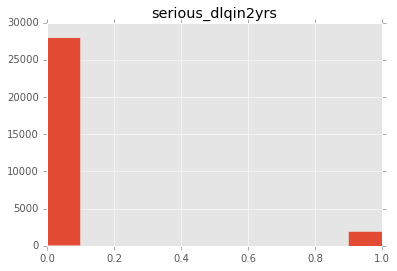

In [180]:
y_test.hist()

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c49e0f0>]], dtype=object)

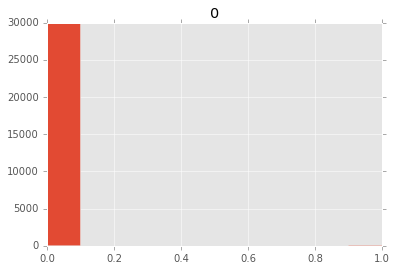

In [179]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

pd.DataFrame(y_pred).hist()

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
np.set_printoptions(precision=3)